<a href="https://colab.research.google.com/github/lanpty58/mystudy/blob/main/Softmax_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
!gdown --id 1kU64ckjel-CpAH352bwU5hWMFT_caZxZ
!unzip '/content/card_fraud_detection.zip'


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1kU64ckjel-CpAH352bwU5hWMFT_caZxZ
From (redirected): https://drive.google.com/uc?id=1kU64ckjel-CpAH352bwU5hWMFT_caZxZ&confirm=t&uuid=6a8aea59-d899-4312-aac2-b25bb5b2c57b
To: /content/card_fraud_detection.zip
100% 69.2M/69.2M [00:00<00:00, 82.6MB/s]
Archive:  /content/card_fraud_detection.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [30]:
dataset_path = '/content/creditcard.csv'
df = pd.read_csv(dataset_path)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [31]:
dataset_arr = df.to_numpy()
X, y = dataset_arr[:, :-1].astype(np.float64), dataset_arr[:, -1].astype(np.uint8)


In [32]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis= 1)

In [33]:
#one-hot encoding label
n_classes = np.unique(y, axis = 0).shape[0]
n_samples = y.shape[0]
y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1


In [35]:
#split train, val, test set
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(X_b, y_encoded, test_size= val_size, random_state= random_state, shuffle = is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size= test_size, random_state = random_state, shuffle = is_shuffle)


In [36]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.fit_transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.fit_transform(X_test[:, 1:])


In [37]:
def softmax(z):
  exp_z = np.exp(z)
  return exp_z/exp_z.sum(axis = 1)[:, None]

def predict(X, theta):
  z = np.dot(X, theta)
  y_h = softmax(z)
  return y_h

def compute_loss(y_h, y):
  n = y.size
  return (-1/n)*np.sum(y*np.log(y_h))

def compute_gradient(X, y, y_h):
  n = y.size
  return np.dot(X.T, (y_h - y))/n

def update_theta(theta, gradient, lr):
  return theta - lr*gradient

def compute_accuracy(X, y, theta):
  y_h = predict(X, theta)
  acc = (np.argmax(y_h, axis=1) == np.argmax(y, axis = 1)).mean()
  return acc

In [39]:
lr = 0.01
epochs = 30
batch_size = 1024
n_feature = X_train.shape[1]
np.random.seed(random_state)
theta = np.random.uniform(size =  (n_feature, n_classes))
theta.shape

(31, 2)

In [40]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
  train_batch_losses = []
  train_batch_accs = []
  val_batch_losses = []
  val_batch_accs = []
  for i in range(0, X_train.shape[0], batch_size):
    X_i = X_train[i: i+batch_size]
    y_i = y_train[i: i+ batch_size]
    y_h = predict(X_i, theta)
    train_loss = compute_loss(y_h, y_i)
    gradient = compute_gradient(X_i, y_i, y_h)
    theta = update_theta(theta, gradient, lr)
    train_acc = compute_accuracy(X_train, y_train, theta)
    train_batch_accs.append(train_acc)
    train_batch_losses.append(train_loss)
    y_val_h = predict(X_val, theta)
    val_loss = compute_loss(y_val_h, y_val)
    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)
    val_batch_losses.append(val_loss)
  train_batch_loss = sum(train_batch_losses)/(len(train_batch_losses)+1e-8)
  train_batch_acc = sum(train_batch_accs)/(len(train_batch_accs) +1e-8)
  val_batch_loss = sum(val_batch_losses)/(len(val_batch_losses) + 1e-8)
  val_batch_acc = sum(val_batch_accs)/(len(val_batch_accs) +1e-8)

  train_losses.append(train_batch_loss)
  train_accs.append(train_batch_acc)
  val_losses.append(val_batch_loss)
  val_accs.append(val_batch_acc)

  print(f'\nEPOCH {epoch +1}:\t Training loss: {train_batch_loss: .3f} \t Validation loss: {val_batch_loss: .3f} \t Train Acc: {train_batch_acc: .3f} \t Val Acc: {val_batch_acc: .3f}')



EPOCH 1:	 Training loss:  0.300 	 Validation loss:  0.301 	 Train Acc:  0.741 	 Val Acc:  0.739

EPOCH 2:	 Training loss:  0.176 	 Validation loss:  0.177 	 Train Acc:  0.909 	 Val Acc:  0.907

EPOCH 3:	 Training loss:  0.115 	 Validation loss:  0.115 	 Train Acc:  0.971 	 Val Acc:  0.971

EPOCH 4:	 Training loss:  0.081 	 Validation loss:  0.082 	 Train Acc:  0.987 	 Val Acc:  0.987

EPOCH 5:	 Training loss:  0.062 	 Validation loss:  0.062 	 Train Acc:  0.993 	 Val Acc:  0.993

EPOCH 6:	 Training loss:  0.049 	 Validation loss:  0.049 	 Train Acc:  0.996 	 Val Acc:  0.996

EPOCH 7:	 Training loss:  0.041 	 Validation loss:  0.041 	 Train Acc:  0.997 	 Val Acc:  0.997

EPOCH 8:	 Training loss:  0.035 	 Validation loss:  0.035 	 Train Acc:  0.998 	 Val Acc:  0.998

EPOCH 9:	 Training loss:  0.031 	 Validation loss:  0.031 	 Train Acc:  0.999 	 Val Acc:  0.999

EPOCH 10:	 Training loss:  0.028 	 Validation loss:  0.027 	 Train Acc:  0.999 	 Val Acc:  0.999

EPOCH 11:	 Training loss:  0

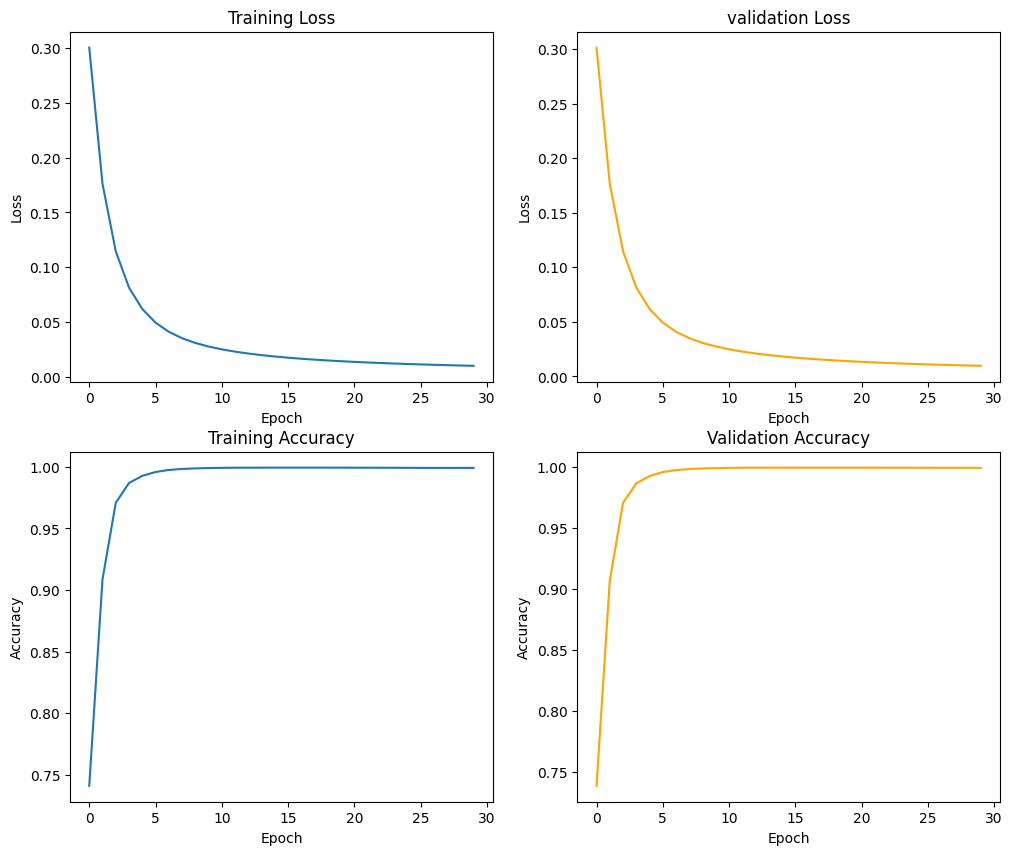

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2, figsize = (12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel = 'Epoch', ylabel = 'Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel = 'Epoch', ylabel = 'Loss')
ax[0, 1].set_title('validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel = 'Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel = 'Epoch', ylabel = 'Accuracy')
ax[1, 1].set_title('Validation Accuracy')
plt.show()
